## 一、导入库

In [5]:
# 数据处理
import numpy as np
import pandas as pd
# KMeans聚类
from sklearn.cluster import KMeans

# 绘图库
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
py.offline.init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

## 二、数据EDA

#### 数据形状

In [ ]:
df.shape

#### 缺失值情况

In [ ]:
df.isnull().sum()

#True =1 ; False=0
#isnull 结果返回0代表所有的值都是False，也就是都 不 是空值

#### 数据类型

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#描述性统计
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 数据可视化

In [7]:
# 1、设置绘图风格
plt.style.use("fivethirtyeight")

# 2、取出重点分析的3个字段
cols = df.columns[2:].tolist() #2:   上图的2column（Age）及以后的column
cols


['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

## 三、3个属性直方图

查看'Age'、 'Annual Income (k$)'、 'Spending Score (1-100)'的直方图，观察整体的分布情况：

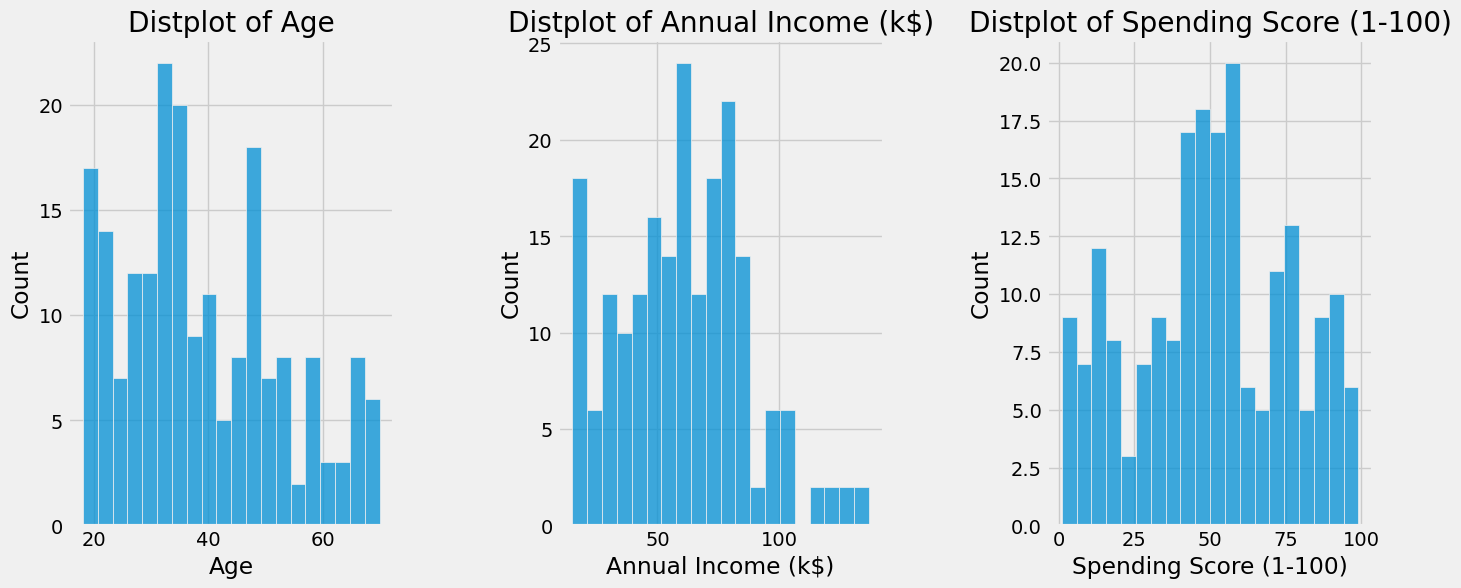

In [8]:
# 绘图
plt.figure(1,figsize=(15,6))  # 画布大小
n = 0

for col in cols:
    n += 1 # 子图位置  n=n+1
    plt.subplot(1,3,n)  # 子图  1,3的意思就是1行三列， n的意思是画第n个
    plt.subplots_adjust(hspace=0.5,wspace=0.5)  # 调整宽高
    sns.histplot(df[col],bins=20)  # 绘制直方图  df[col] 第一次循环就是df[Age]然后一个一个来； bins就是柱子的数量；bins越多柱子约细
    plt.title(f'Distplot of {col}')  # 标题 
plt.show()  # 显示图形

## 四、性别因素

#### 性别人数统计

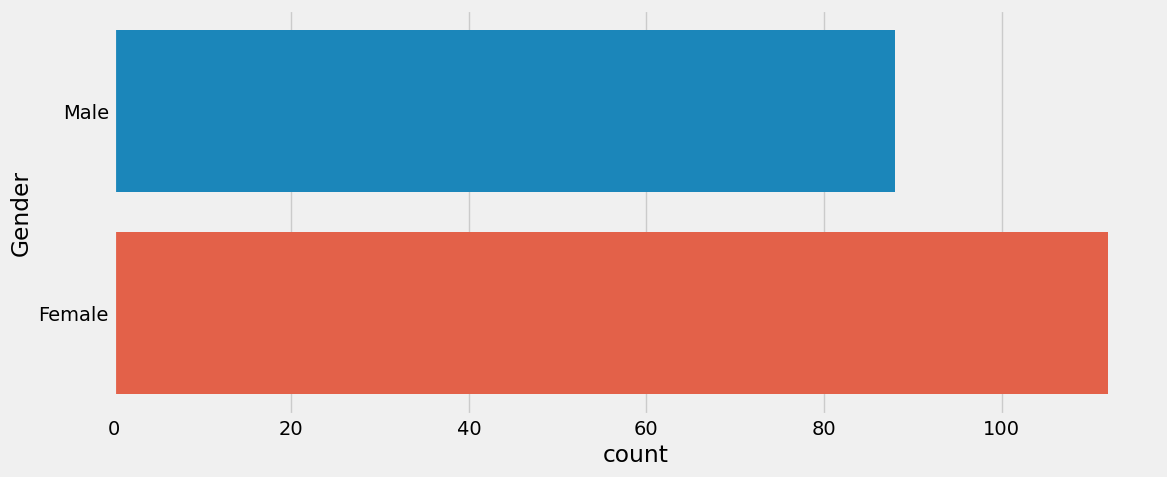

In [9]:
plt.figure(1,figsize=(12,5))

sns.countplot(y='Gender',data=df) #countplot的意思就是 统计各个类别的数量

plt.show()

#### 不同性别下的数据分布

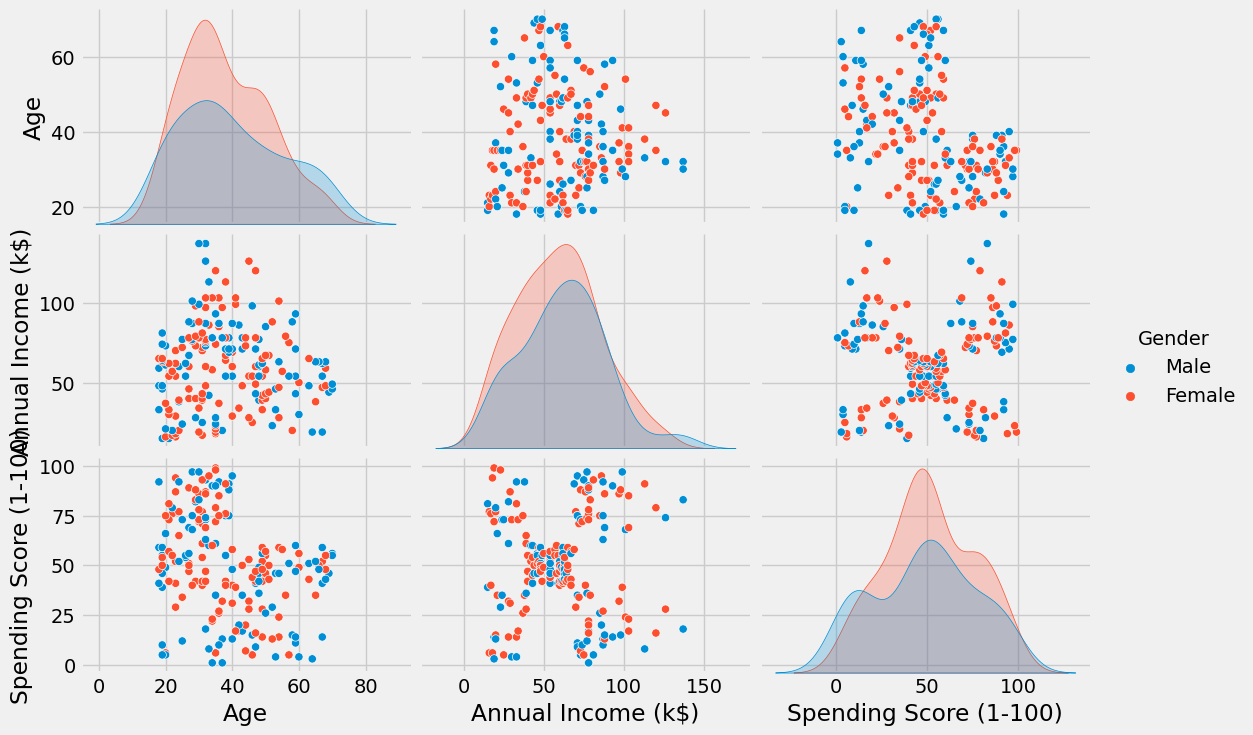

In [10]:
sns.pairplot(df.drop(["CustomerID"],axis=1), #删除了customerID这列
             hue="Gender",  # 分组字段
             aspect=1.5)  #pairplot就是展现两两变量之间的关系
plt.show()

#### 通过上面的双变量分布图，我们观察到：性别因素对其他3个字段的影响不大

### 不同性别下年龄和平均收入的关系

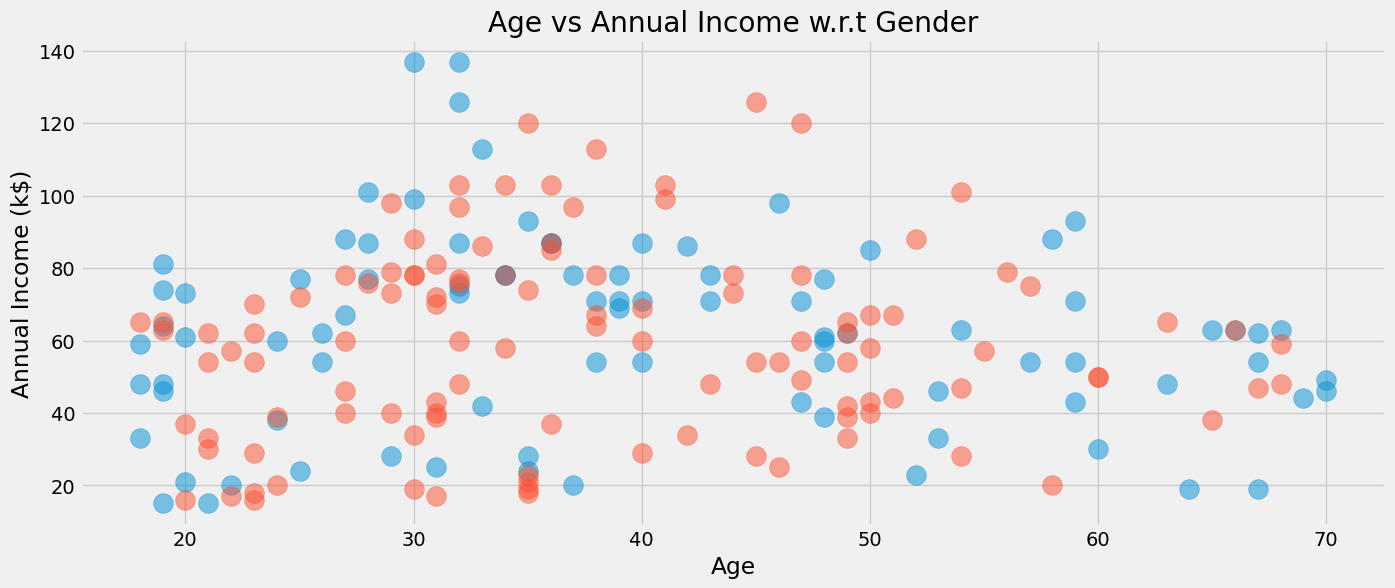

In [11]:
plt.figure(1,figsize=(15,6))  # 绘图大小

for gender in ["Male", "Female"]:
    plt.scatter(x="Age", y="Annual Income (k$)", # 指定两个分析的字段
                data=df[df["Gender"] == gender],  # 待分析的数据，某个gender下  select * from df where Gender='male'/famale
                s=200,alpha=0.5,label=gender  # 散点的大小、透明度、标签分类
               )
#横纵轴、标题设置 
plt.xlabel("Age")  
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income w.r.t Gender")
# 显示图形
plt.show()

### 不同性别下平均收入和消费得分的关系

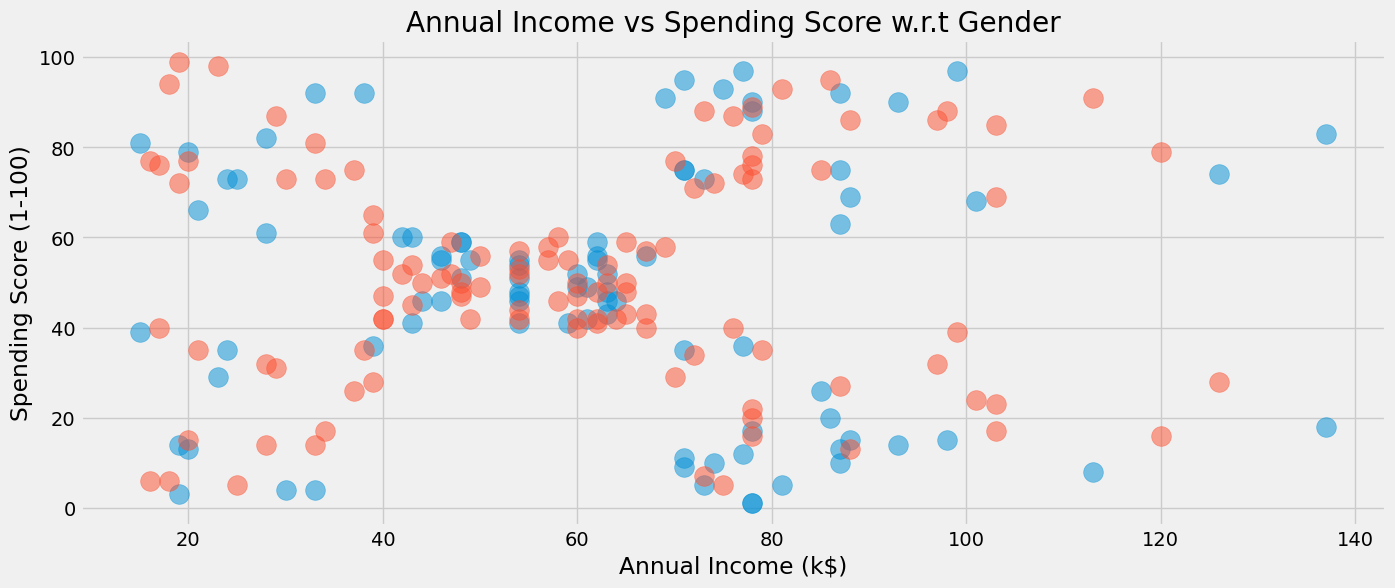

In [12]:
plt.figure(1,figsize=(15,6))

for gender in ["Male", "Female"]:  # 解释参考上面
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',
                data=df[df["Gender"] == gender],
                s=200,alpha=0.5,label=gender)
    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title("Annual Income vs Spending Score w.r.t Gender")
plt.show()

### 不同性别下的数据分布情况
#### 通过小提琴图和分簇散点图来观察数据分布情况：

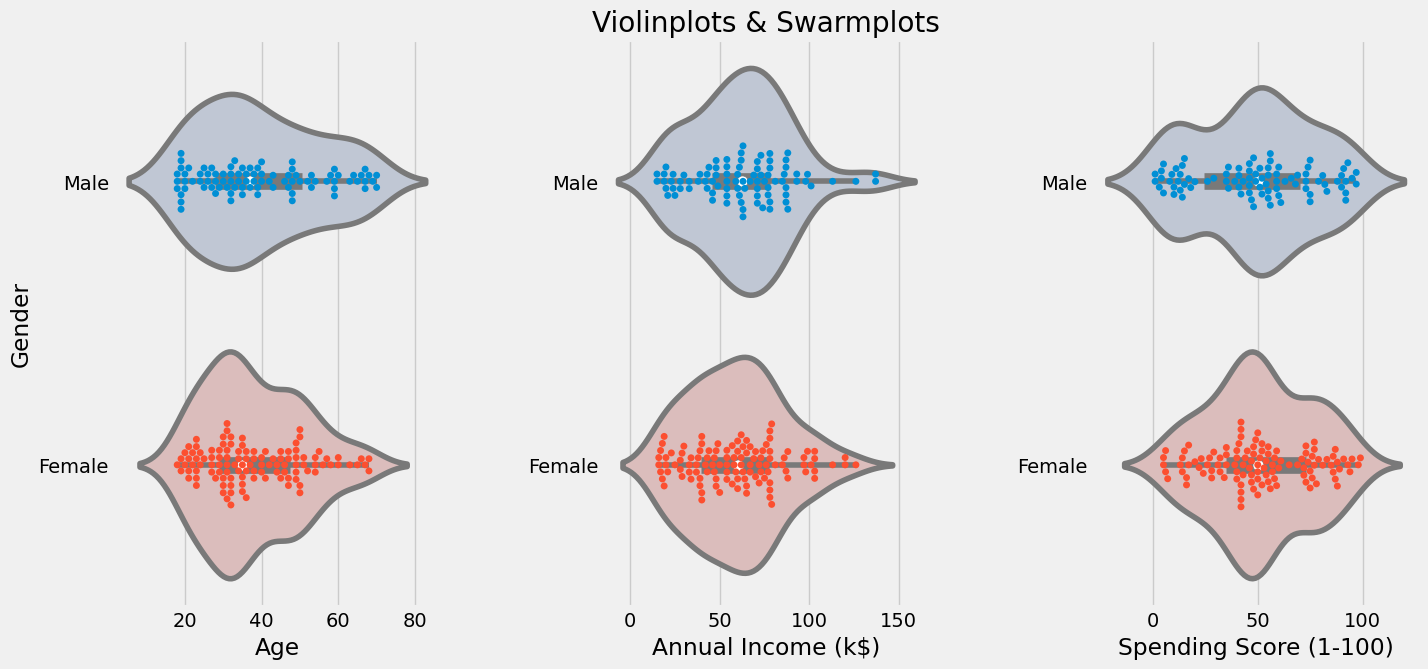

In [13]:
# 分簇散点图：Swarmplots
# 小提琴图：violinplot

plt.figure(1,figsize=(15,7))
n = 0

for col in cols:
    n += 1  # 子图顺序
    plt.subplot(1,3,n)  # 第n个子图
    plt.subplots_adjust(hspace=0.5,wspace=0.5)  # 调整宽高
    # 绘制某个col下面的两种图形，通过Gender进行分组显示
    sns.violinplot(x=col,y="Gender",data=df,palette = "vlag") 
    sns.swarmplot(x=col, y="Gender",data=df)
    # 轴和标题设置
    plt.ylabel("Gender" if n == 1 else '')
    plt.title("Violinplots & Swarmplots" if n == 2 else '')
    
plt.show()

## 五、属性相关性分析

In [14]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # 这3个属性的相关性分析

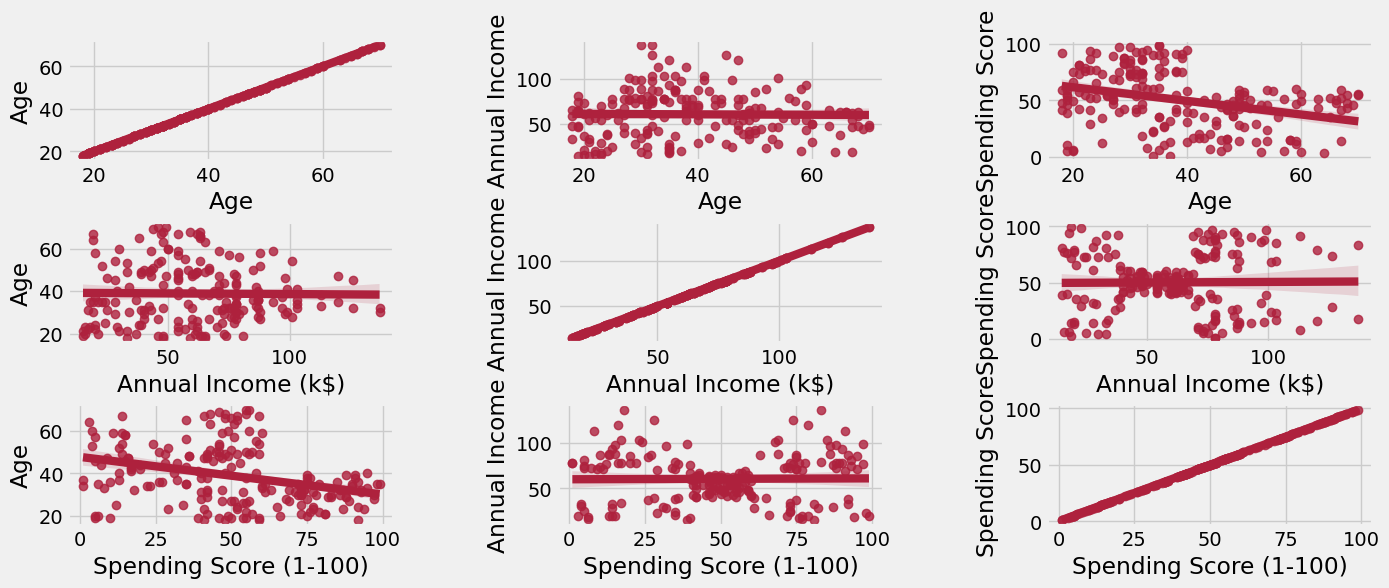

In [15]:
plt.figure(1,figsize=(15,6))
n = 0

for x in cols:
    for y in cols:
        n += 1  # 每循环一次n增加，子图移动一次
        plt.subplot(3,3,n)  # 3*3的矩阵，第n个图形
        plt.subplots_adjust(hspace=0.5, wspace=0.5)  # 子图间的宽、高参数
        sns.regplot(x=x,y=y,data=df,color="#AE213D")  # 绘图的数据和颜色
        plt.ylabel(y.split()[0] + " " + y.split()[1] if len(y.split()) > 1 else y)
        
plt.show()

#### 上图表明两点：

主对角线是自身和自身的关系，成正比例
其他图形是属性间的，有数据的散点分布，同时还有模拟的相关趋势图

## 六、两个属性间的聚类

在这里不具体讲解聚类算法的原理和过程，默认有基础

K值选取
我们通过绘制数据的ELBOW图来确定k值。资料大放送：

1、来自官网的参数解释：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2、中文解释参考：https://blog.csdn.net/qq_34104548/article/details/79336584

In [16]:
df1 = df[['Age' , 'Spending Score (1-100)']].iloc[:,:].values  # 待拟合数据
inertia = []   # 空列表，用来存储到质心的距离之和

for k in range(1,11):  # k值的选取默认是在1-10之间，经验值是5或者10
    algorithm = (KMeans(n_clusters=k,  # k值
                       init="k-means++",  # 初始算法选择
                       n_init=10,  # 随机运行次数
                       max_iter=300,  # 最多迭代次数
                       tol=0.0001,  # 容忍最小误差
                       random_state=111,  # 随机种子
                       algorithm="full"))  # 算法选择 auto、full、elkan
    algorithm.fit(df1)  # 拟合数据
    inertia.append(algorithm.inertia_)  # 质心之和

In [17]:
inertia

[171535.49999999997,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23839.439633173846,
 19576.013221355333,
 15514.19313435103,
 13020.333585858587,
 11480.045478271728,
 10187.846101364525]

#### 绘制出K值的变化和质心距离之和的关系

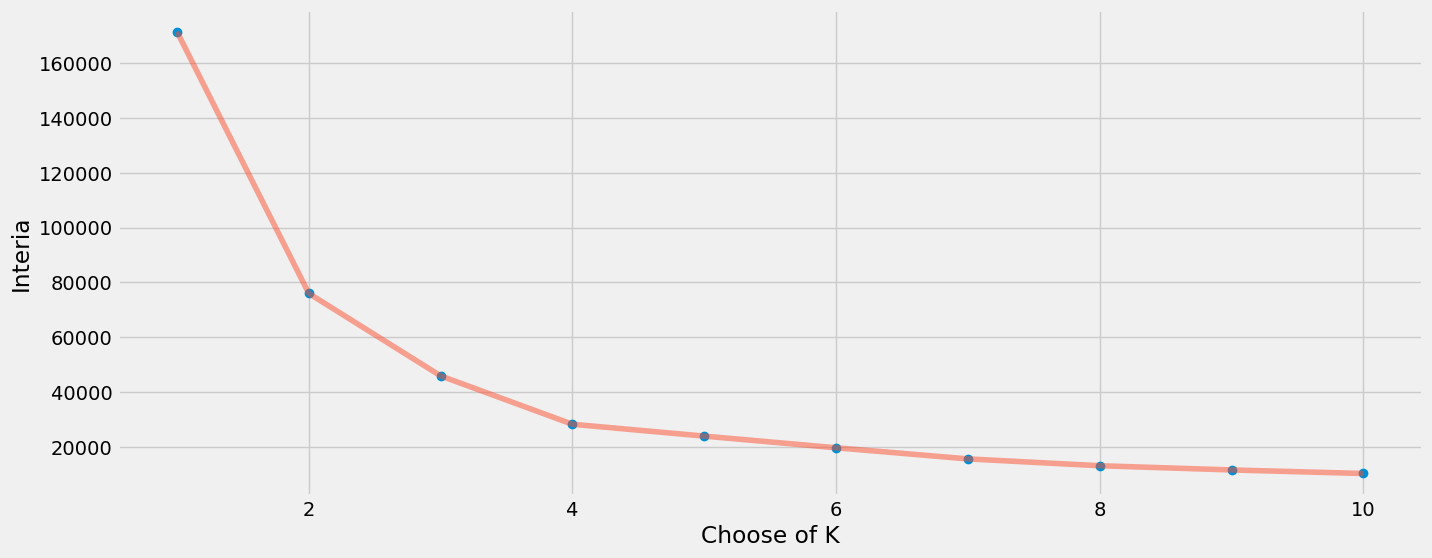

In [18]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')  # 数据绘制两次，标记不同
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)

plt.xlabel("Choose of K")
plt.ylabel("Interia")
plt.show()

最终我们发现：k=4是比较合适的。于是采用k=4来进行数据的真实拟合过程

### 聚类建模

In [19]:
algorithm = (KMeans(n_clusters=4,  # k=4
                       init="k-means++",
                       n_init=10,
                       max_iter=300,
                       tol=0.0001,
                       random_state=111,
                       algorithm="elkan"))
algorithm.fit(df1)  # 模拟数据

KMeans(algorithm='elkan', n_clusters=4, random_state=111)

数据进行了fit操作之后，我们得到了标签label和4个质心：

In [20]:
labels1 = algorithm.labels_  # 分类的结果（4类）
centroids1 = algorithm.cluster_centers_  # 最终质心的位置

print("labels1:", labels1)
print("centroids1:", centroids1)

labels1: [0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
centroids1: [[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


## 七、3个属性的聚类

根据Age 、 Annual Income 、 Spending Score来进行聚类，最终绘制成3维图形。
#### K值选取
方法都是相同的，只不过选取了3个字段（上面是某2个）

In [21]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values  # 选取3个字段的数据
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n,
                        init='k-means++', 
                        n_init = 10 ,
                        max_iter=300, 
                        tol=0.0001,  
                        random_state= 111  , 
                        algorithm='elkan') )
    algorithm.fit(X3)   # 拟合数据
    inertia.append(algorithm.inertia_)

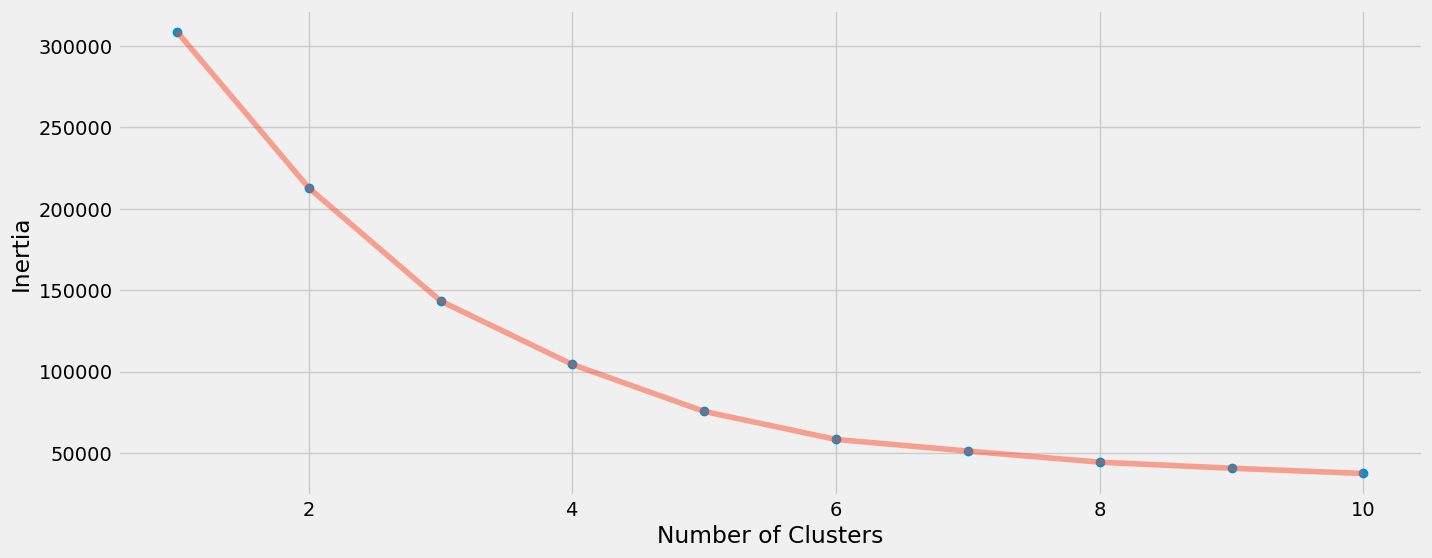

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

我们最终选取k=6来聚类

#### 建模拟合

In [23]:
algorithm = (KMeans(n_clusters=6,  # 确定的k值
                    init="k-means++",
                    n_init=10,
                    max_iter=300,
                    tol=0.0001,
                    random_state=111,
                    algorithm="elkan"))
algorithm.fit(X3)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

print(labels2)
print(centroids2)

[4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 2 5 2 0 4 5 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 3 0 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]
[[27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [56.15555556 53.37777778 49.08888889]
 [32.69230769 86.53846154 82.12820513]
 [44.14285714 25.14285714 19.52380952]
 [25.27272727 25.72727273 79.36363636]]


In [24]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

绘图
3维的聚类我们最终选择plotly来展示：

In [25]:
df["labels2"] = labels2

trace = go.Scatter3d(
    x=df["Age"],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    
    marker = dict(
        color=df["labels2"],
        size=20,
        line=dict(color=df["labels2"],width=12),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(l=0,r=0,b=0,t=0),
    title="six Clusters",
    scene=dict(
        xaxis=dict(title="Age"),
        yaxis = dict(title  = 'Spending Score'),
        zaxis = dict(title  = 'Annual Income')
    )
)

fig = go.Figure(data=data,layout=layout)

fig.show()